In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3.1 Problem1 number1

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

# 1. Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# 2. Identify the number of rows and columns
print(f"\nNumber of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# 3. List all columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

# 1. Calculate mean, median, and standard deviation for the Score column
print("\nBasic statistics for the Score column:")
print(f"Mean: {df['score'].mean()}")
print(f"Median: {df['score'].median()}")
print(f"Standard Deviation: {df['score'].std()}")

# 2. Identify the country with the highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']
print(f"\nCountry with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

# 1. Check for missing values
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)

# 1. Filter dataset for countries with Score > 7.5
filtered_df = df[df['score'] > 7.5]
print(f"\nCountries with Score > 7.5: {filtered_df.shape[0]} entries")

# 2. Sort by GDP per Capita in descending order and display top 10 rows
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries by GDP per Capita (Score > 7.5):")
print(sorted_df.head(10))

# 1. Create Happiness Category based on Score
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(happiness_category)
print("\nDataset with Happiness Category added:")
print(df[['Country name', 'score', 'Happiness Category']].head(10))


First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

Problem-2 number2

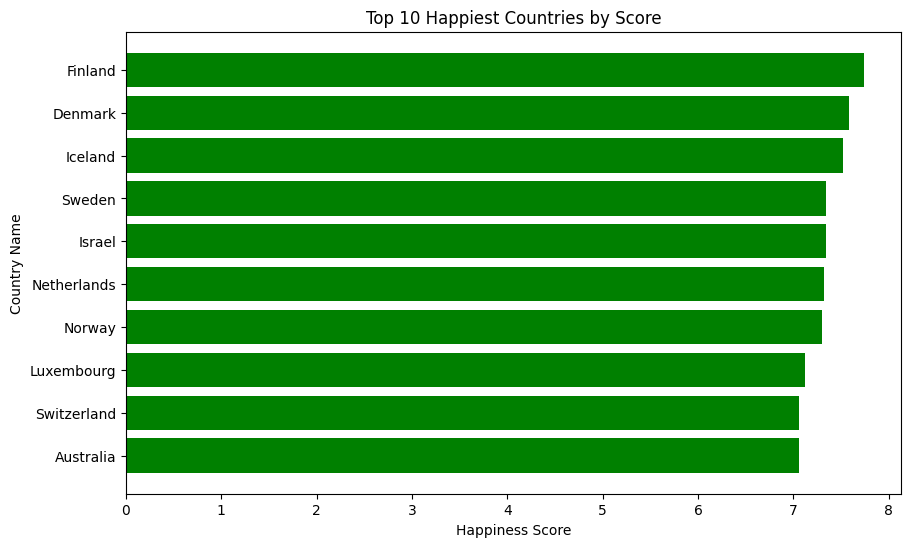

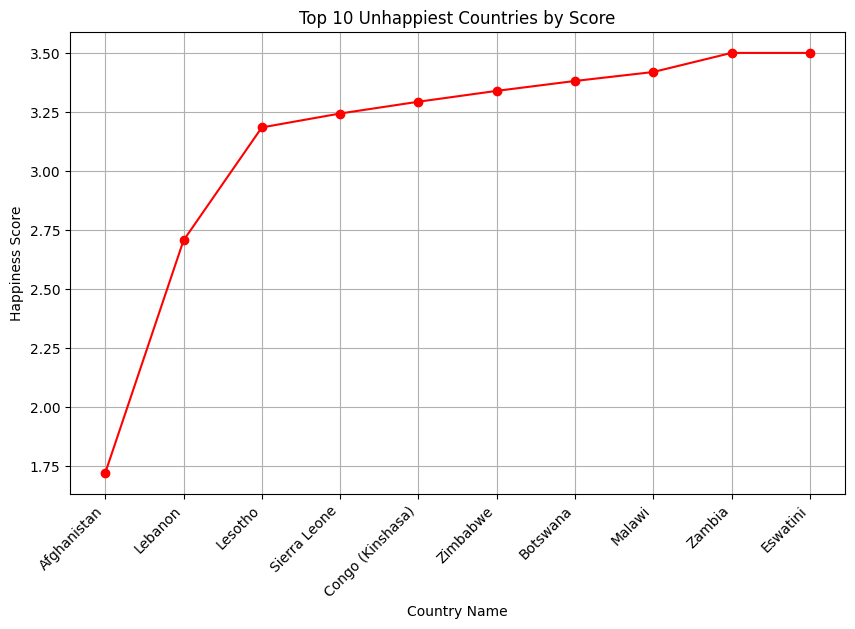

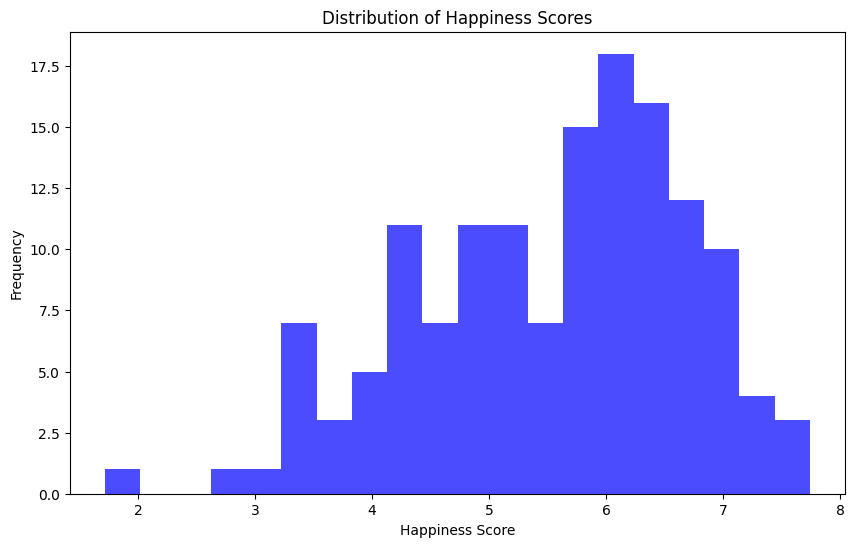

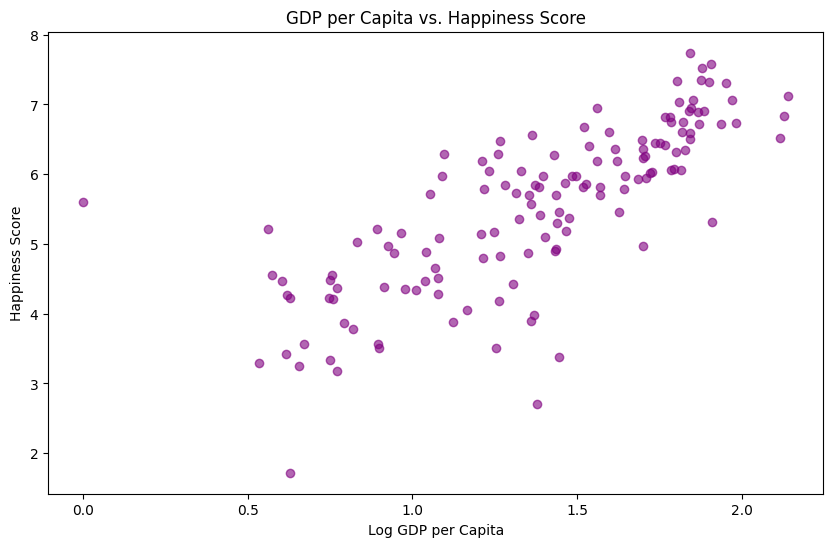

In [ ]:
import matplotlib.pyplot as plt

# Bar Plot: Top 10 Happiest Countries by Score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.barh(top_10_happiest['Country name'], top_10_happiest['score'], color='green')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Line Plot: Top 10 Unhappiest Countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

# Histogram: Distribution of Scores
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: GDP per Capita vs. Happiness Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], c='purple', alpha=0.6)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


3.2 Problem-2 Task-1

In [ ]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filtering the dataset
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Displaying the filtered dataset
print("South Asia Dataset:")
print(south_asia_df)

# Save the filtered dataset as a separate CSV file
output_file_path = '/content/drive/MyDrive/Colab Notebooks/South_Asia_Dataset.csv'
south_asia_df.to_csv(output_file_path, index=False)
print(f"Filtered dataset saved to {output_file_path}")


South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of

Task-2

<ipython-input-10-c77cc2f1e950>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


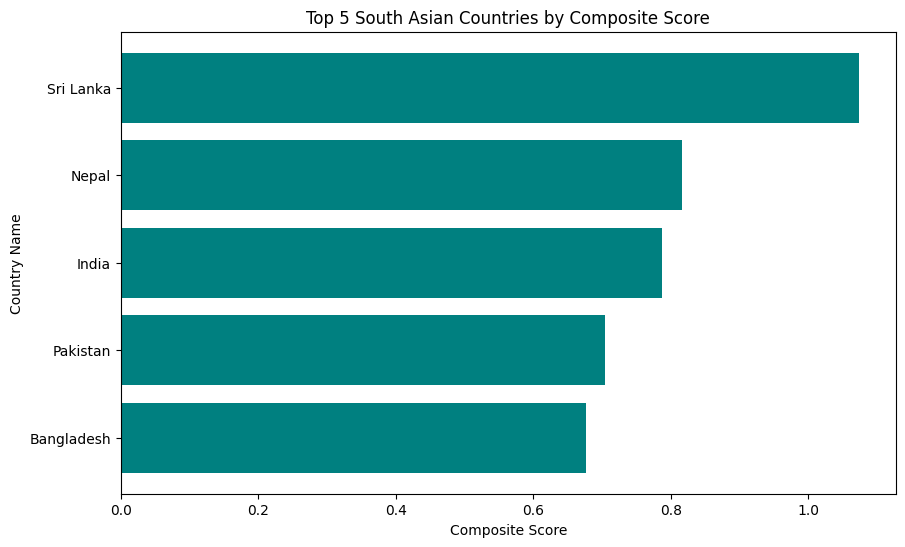

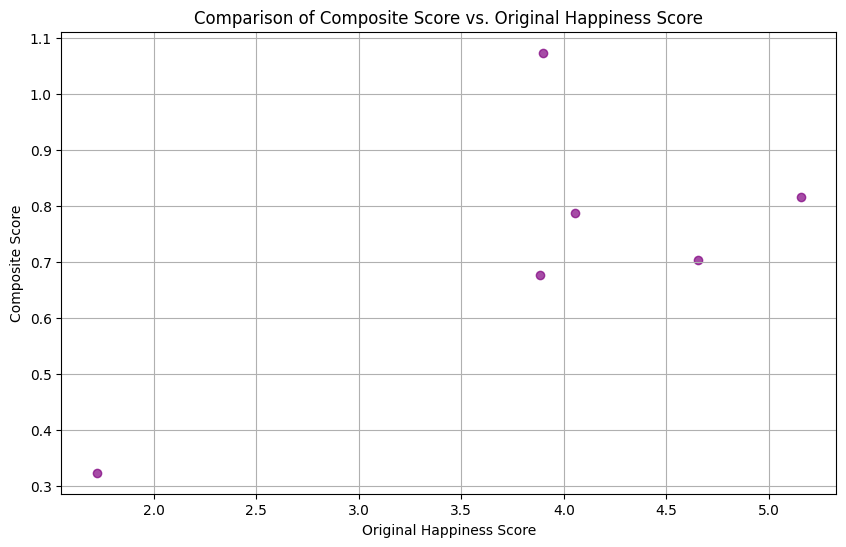

South Asian Countries: Composite vs. Original Score Rankings
    Country name  score  Composite Score  Rank Difference
127    Sri Lanka  3.898           1.0739              3.0
92         Nepal  5.158           0.8159             -1.0
125        India  4.054           0.7874              0.0
107     Pakistan  4.657           0.7039             -2.0
128   Bangladesh  3.886           0.6774              0.0
142  Afghanistan  1.721           0.3238              0.0


In [ ]:
import matplotlib.pyplot as plt

# Calculate Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Ranking countries based on Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

top_5_composite = south_asia_df.nlargest(5, 'Composite Score')
plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='teal')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Compare Composite Score with Original Score using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['score'], south_asia_df['Composite Score'], color='purple', alpha=0.7)
plt.title('Comparison of Composite Score vs. Original Happiness Score')
plt.xlabel('Original Happiness Score')
plt.ylabel('Composite Score')
plt.grid()
plt.show()

# Analyzing rank differences between Composite Score and Original Score
south_asia_df['Rank Difference'] = (
    south_asia_df['score'].rank(ascending=False) - south_asia_df['Composite Score'].rank(ascending=False)
)

# Display the analysis
print("South Asian Countries: Composite vs. Original Score Rankings")
print(south_asia_df[['Country name', 'score', 'Composite Score', 'Rank Difference']])


Task-3

Outlier Countries based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


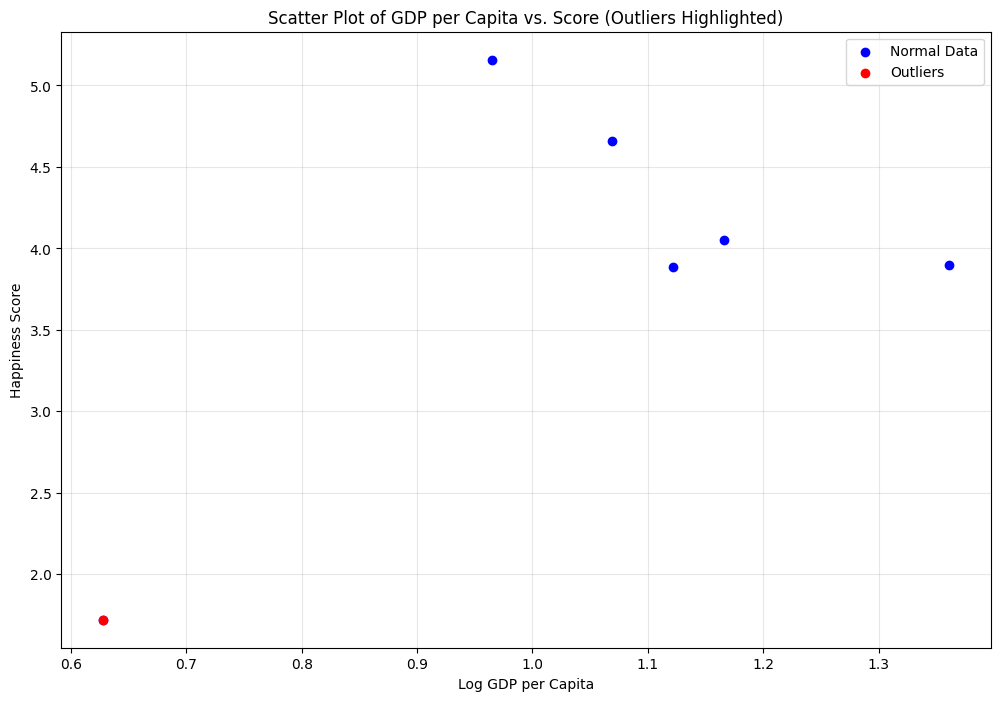


Discussion:
The identified outlier countries are those with scores or GDP per capita values that fall outside the 1.5 × IQR range.
These outliers can significantly impact regional averages by skewing the data. High outliers may elevate the average,
while low outliers may depress it. Understanding these outliers is important for more accurate regional analysis.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identifying outliers for 'score' and 'Log GDP per capita'
score_outliers = detect_outliers(south_asia_df, 'score')
gdp_outliers = detect_outliers(south_asia_df, 'Log GDP per capita')

# Combine the unique outlier countries
outlier_countries = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Display outliers
print("Outlier Countries based on Score and GDP per Capita:")
print(outlier_countries[['Country name', 'score', 'Log GDP per capita']])

# Creatin g a scatter plot highlighting outliers
plt.figure(figsize=(12, 8))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='Normal Data')
plt.scatter(outlier_countries['Log GDP per capita'], outlier_countries['score'], color='red', label='Outliers')

plt.title('Scatter Plot of GDP per Capita vs. Score (Outliers Highlighted)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Discussion
print("\nDiscussion:")
print("The identified outlier countries are those with scores or GDP per capita values that fall outside the 1.5 × IQR range.")
print("These outliers can significantly impact regional averages by skewing the data. High outliers may elevate the average,")
print("while low outliers may depress it. Understanding these outliers is important for more accurate regional analysis.")


Task-4

Pearson Correlation with Score:
Freedom to make life choices: 0.80
Generosity: 0.87


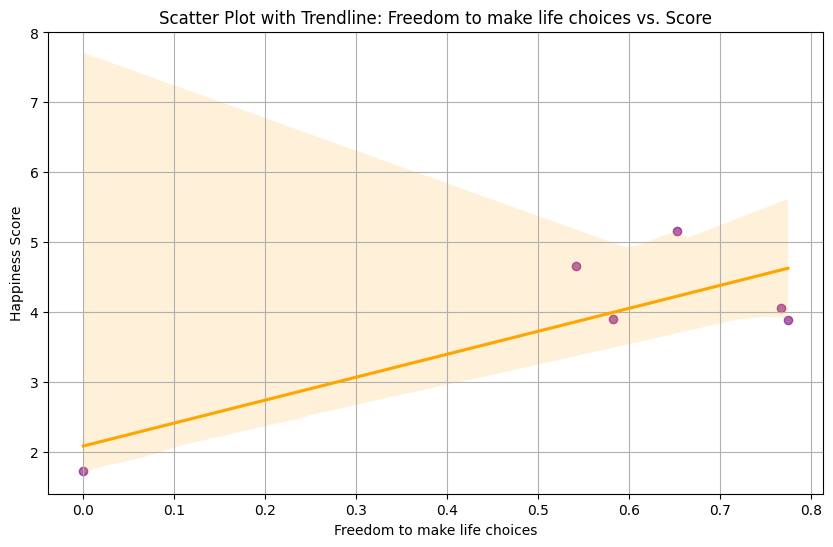

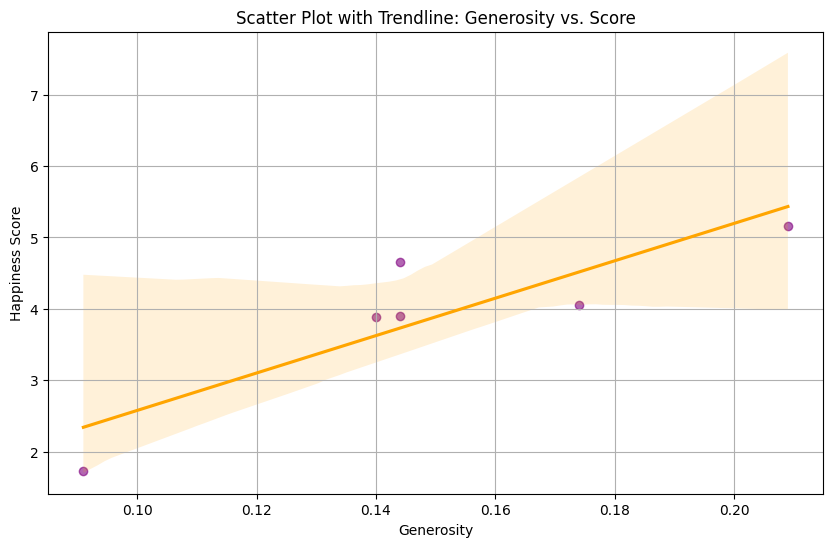

The strongest relationship is between 'Generosity' and the score, with a correlation of 0.87.
The weakest relationship is between 'Freedom to make life choices' and the score, with a correlation of 0.80.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Pearson correlation
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {metric: south_asia_df['score'].corr(south_asia_df[metric]) for metric in metrics}

# Display correlation results
print("Pearson Correlation with Score:")
for metric, corr_value in correlations.items():
    print(f"{metric}: {corr_value:.2f}")

# Scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=south_asia_df[metric],
        y=south_asia_df['score'],
        scatter_kws={'color': 'purple', 'alpha': 0.6},
        line_kws={'color': 'orange'}
    )
    plt.title(f'Scatter Plot with Trendline: {metric} vs. Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.grid()
    plt.show()

# Discuss the strongest and weakest relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print(f"The strongest relationship is between '{strongest_metric}' and the score, with a correlation of {correlations[strongest_metric]:.2f}.")
print(f"The weakest relationship is between '{weakest_metric}' and the score, with a correlation of {correlations[weakest_metric]:.2f}.")


Task-5

South Asian Countries Ranked by GDP-Score Gap (Ascending):
    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
128   Bangladesh               1.122  3.886         -2.764
127    Sri Lanka               1.361  3.898         -2.537
142  Afghanistan               0.628  1.721         -1.093

South Asian Countries Ranked by GDP-Score Gap (Descending):
    Country name  Log GDP per capita  score  GDP-Score Gap
142  Afghanistan               0.628  1.721         -1.093
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764
125        India               1.166  4.054         -2.888
107     Pakistan               1.069  4.657         -3.588
92         Nepal               0.965  5.158         -4.193


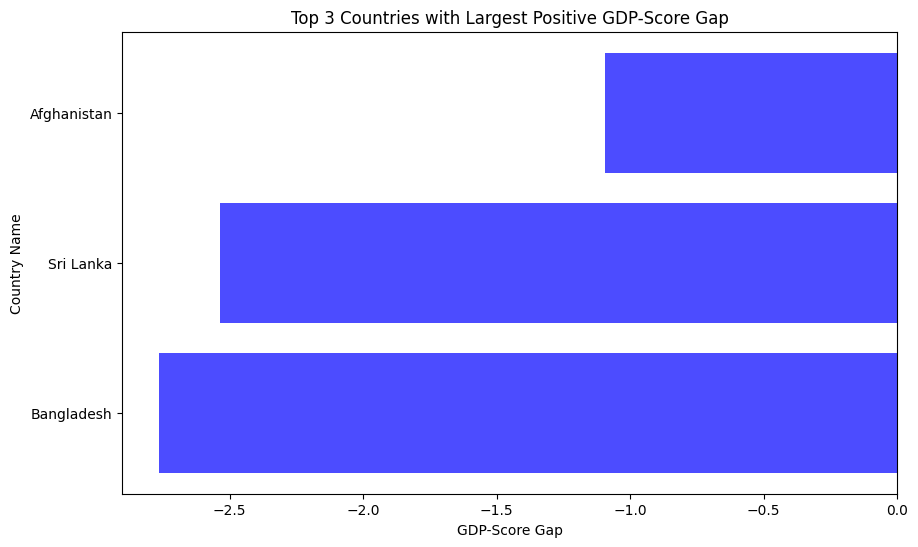

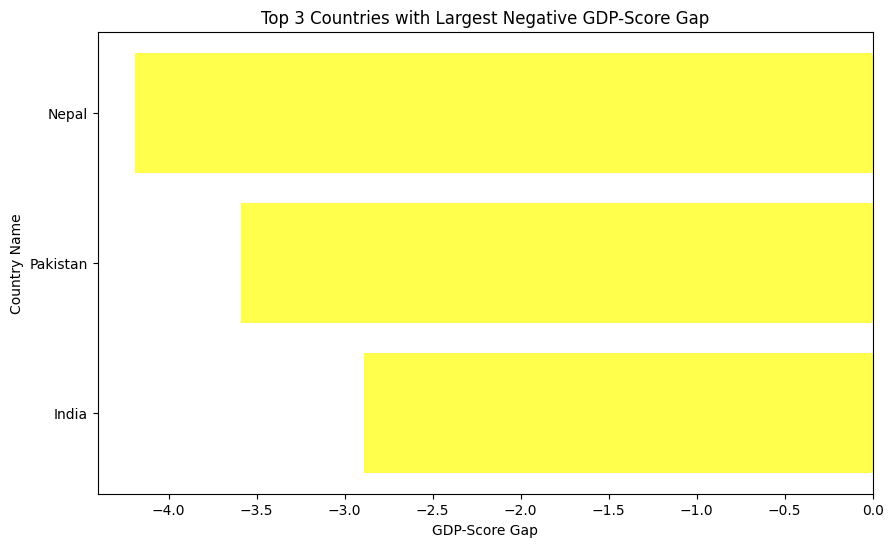

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WHR-2024-5CS037.csv')

# Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()

# Add GDP-Score Gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank countries by GDP-Score Gap
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Display rankings
print("South Asian Countries Ranked by GDP-Score Gap (Ascending):")
print(ascending_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

print("\nSouth Asian Countries Ranked by GDP-Score Gap (Descending):")
print(descending_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

# Highlight top 3 countries with largest positive and negative gaps using bar charts

# Largest positive gaps
top_3_positive_gap = descending_gap.head(3)

# Largest negative gaps
top_3_negative_gap = ascending_gap.head(3)

# Plotting the top 3 positive gaps
plt.figure(figsize=(10, 6))
plt.barh(top_3_positive_gap['Country name'], top_3_positive_gap['GDP-Score Gap'], color='blue', alpha=0.7)
plt.title('Top 3 Countries with Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.gca().invert_yaxis()
plt.show()

# Plotting the top 3 negative gaps
plt.figure(figsize=(10, 6))
plt.barh(top_3_negative_gap['Country name'], top_3_negative_gap['GDP-Score Gap'], color='yellow', alpha=0.7)
plt.title('Top 3 Countries with Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.gca().invert_yaxis()
plt.show()


3.3 Problem-3

South Asia - Mean: 3.90, Std Dev: 1.18
Middle East - Mean: 5.41, Std Dev: 1.57
Higher Avg Happiness: Middle East


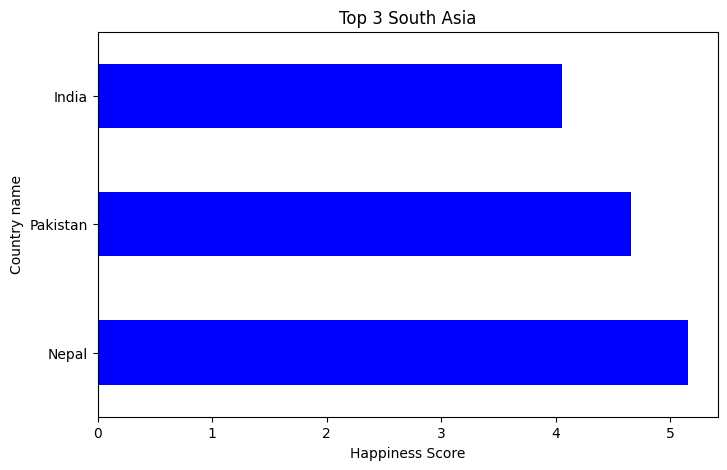

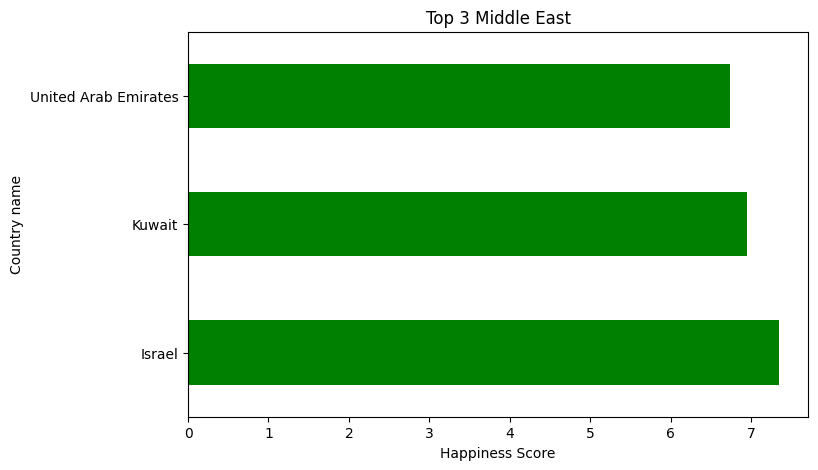

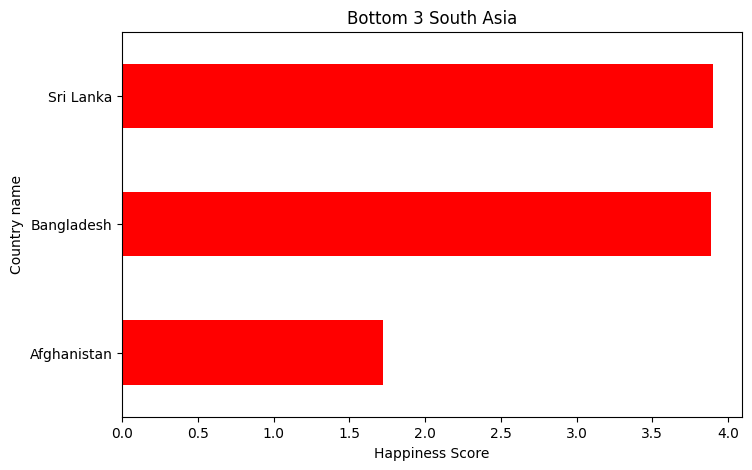

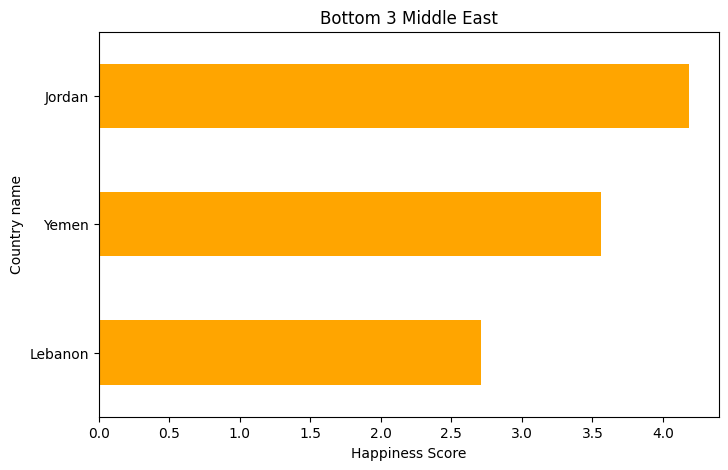

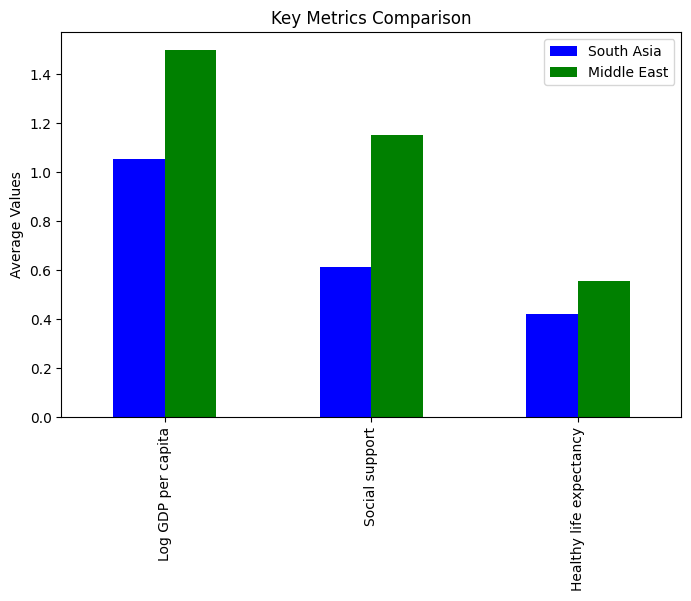

South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29
Greater Variability: South Asia

Correlation Matrix (South Asia):
                                  score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  


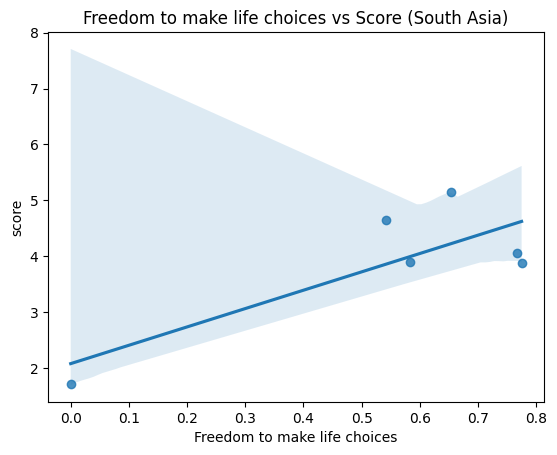

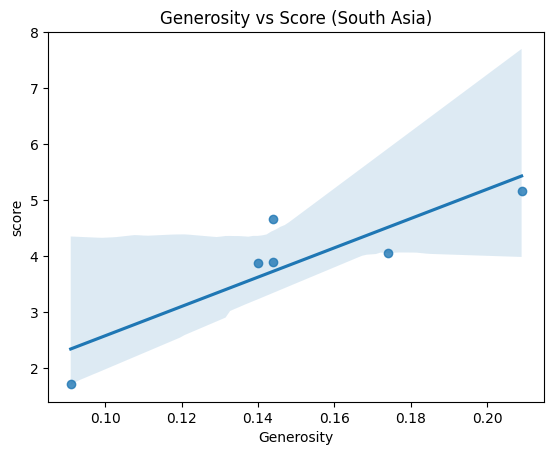


Correlation Matrix (Middle East):
                                  score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


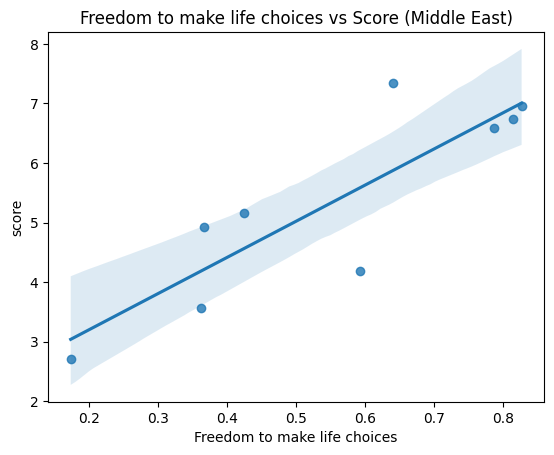

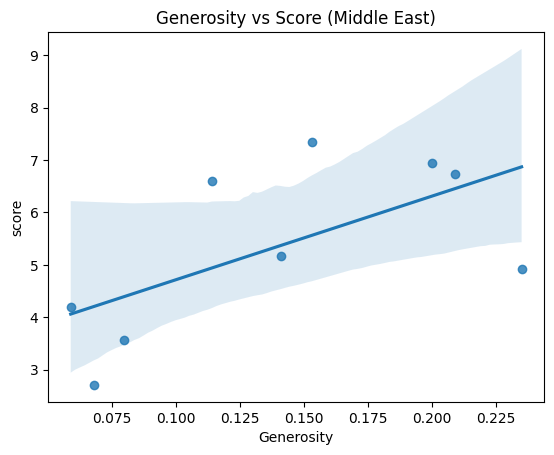

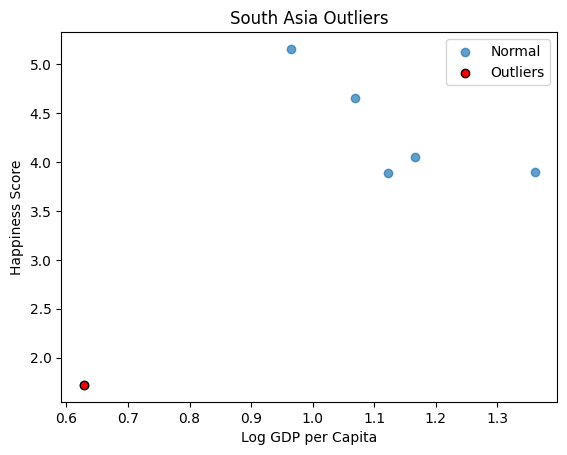

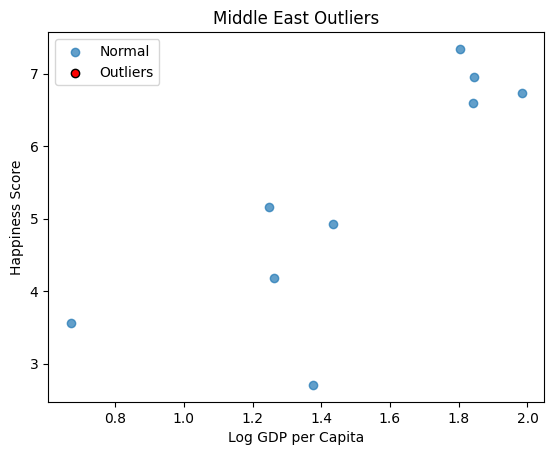

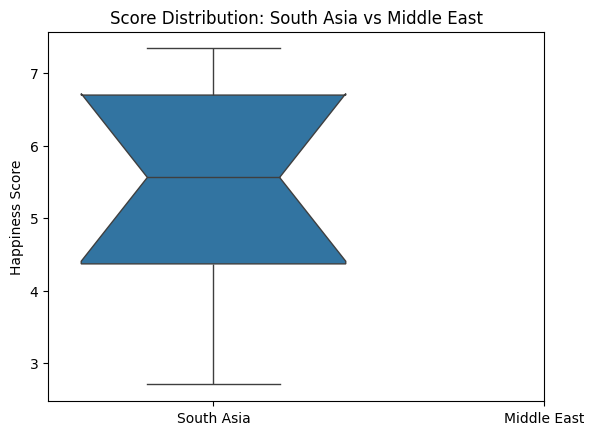

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/Colab Notebooks/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
                         "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter datasets
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Descriptive Statistics
mean_sa, std_sa = south_asia_df['score'].mean(), south_asia_df['score'].std()
mean_me, std_me = middle_east_df['score'].mean(), middle_east_df['score'].std()
print(f"South Asia - Mean: {mean_sa:.2f}, Std Dev: {std_sa:.2f}")
print(f"Middle East - Mean: {mean_me:.2f}, Std Dev: {std_me:.2f}")
print("Higher Avg Happiness:", "South Asia" if mean_sa > mean_me else "Middle East")

# Top and Bottom Performers
top_3_sa = south_asia_df.nlargest(3, 'score')
bottom_3_sa = south_asia_df.nsmallest(3, 'score')
top_3_me = middle_east_df.nlargest(3, 'score')
bottom_3_me = middle_east_df.nsmallest(3, 'score')

# Plot top and bottom performers
def plot_bar(data, title, color):
    data.plot(kind='barh', x='Country name', y='score', color=color, legend=False, figsize=(8, 5))
    plt.title(title)
    plt.xlabel('Happiness Score')
    plt.show()

plot_bar(top_3_sa, 'Top 3 South Asia', 'blue')
plot_bar(top_3_me, 'Top 3 Middle East', 'green')
plot_bar(bottom_3_sa, 'Bottom 3 South Asia', 'red')
plot_bar(bottom_3_me, 'Bottom 3 Middle East', 'orange')

# Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
mean_metrics_sa = south_asia_df[metrics].mean()
mean_metrics_me = middle_east_df[metrics].mean()
comparison_df = pd.DataFrame({'South Asia': mean_metrics_sa, 'Middle East': mean_metrics_me})
comparison_df.plot(kind='bar', figsize=(8, 5), color=['blue', 'green'])
plt.title('Key Metrics Comparison')
plt.ylabel('Average Values')
plt.show()

# Happiness Disparity
range_sa, cv_sa = south_asia_df['score'].max() - south_asia_df['score'].min(), south_asia_df['score'].std() / south_asia_df['score'].mean()
range_me, cv_me = middle_east_df['score'].max() - middle_east_df['score'].min(), middle_east_df['score'].std() / middle_east_df['score'].mean()
print(f"South Asia - Range: {range_sa:.2f}, CV: {cv_sa:.2f}")
print(f"Middle East - Range: {range_me:.2f}, CV: {cv_me:.2f}")
print("Greater Variability:", "South Asia" if cv_sa > cv_me else "Middle East")

# Correlation Analysis
for region_name, data in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    corr = data[['score', 'Freedom to make life choices', 'Generosity']].corr()
    print(f"\nCorrelation Matrix ({region_name}):\n", corr)
    for metric in ['Freedom to make life choices', 'Generosity']:
        sns.regplot(x=metric, y='score', data=data)
        plt.title(f'{metric} vs Score ({region_name})')
        plt.show()

#  Outlier Detection
def detect_outliers(df, column):
    Q1, Q3 = df[column].quantile(0.25), df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

outliers_sa = detect_outliers(south_asia_df, 'score')
outliers_me = detect_outliers(middle_east_df, 'score')

# Scatter plot with outliers
def plot_outliers(data, outliers, title):
    plt.scatter(data['Log GDP per capita'], data['score'], label='Normal', alpha=0.7)
    plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers', edgecolor='black')
    plt.title(title)
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()

plot_outliers(south_asia_df, outliers_sa, 'South Asia Outliers')
plot_outliers(middle_east_df, outliers_me, 'Middle East Outliers')

# Boxplots
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], notch=True)
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Score Distribution: South Asia vs Middle East')
plt.ylabel('Happiness Score')
plt.show()
